<a href="https://colab.research.google.com/github/Kondwani7/Resume_screening-/blob/main/Job_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
data = pd.read_csv('/content/drive/MyDrive/practice datasets/UpdatedResumeDataSet.csv')

#Data investigation

In [4]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
data.describe

<bound method NDFrame.describe of          Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]>

In [9]:
print("Total resumes: ", data.shape[0])

Total resumes:  962


In [10]:
#null data
data.isna().sum()

Category        0
Resume          0
clean_resume    0
dtype: int64

In [6]:
data['clean_resume'] = ''
data.head()

,Category,Resume,clean_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [7]:
print(data['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


#Data Visualisation

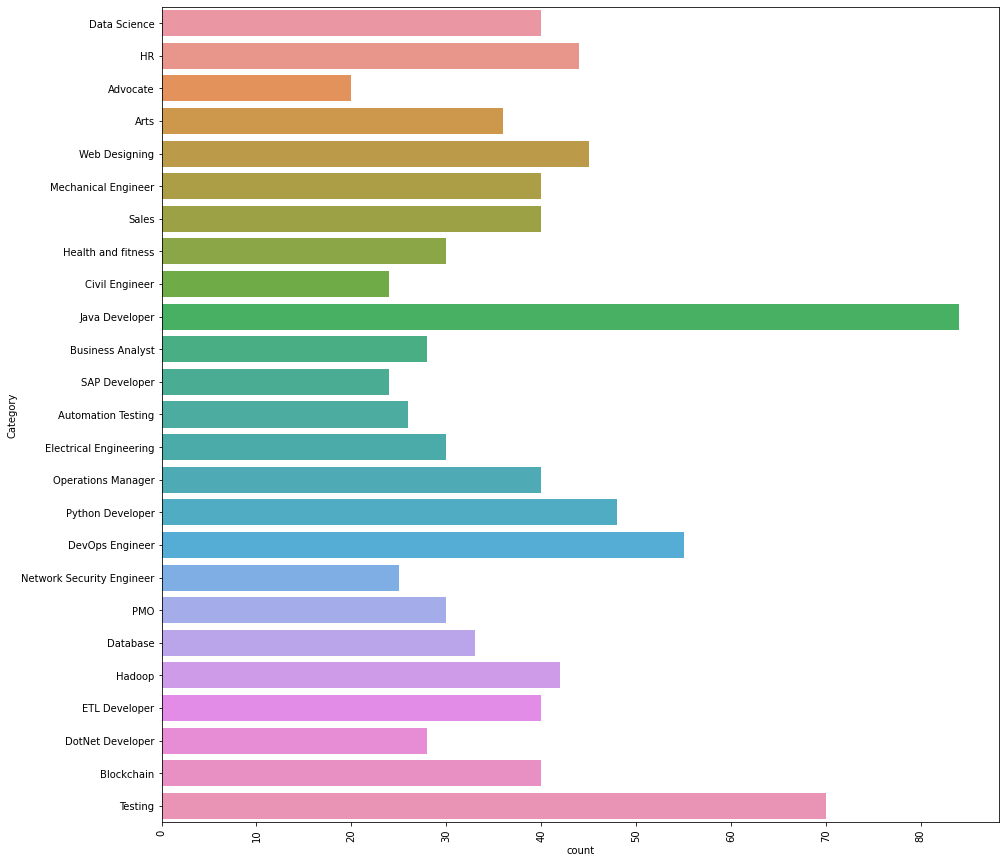

In [11]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)


In [29]:
import re
def cleanResume(resumeText):
  resumeText = re.sub('http\S+\s*', ' ', resumeText) #remove URls
  resumeText = re.sub('RT|cc', ' ', resumeText)#remove RT and C
  resumeText = re.sub('#\S+', ' ', resumeText) #remoe hashtags
  resumeText = re.sub('@\S+', ' ', resumeText) #remove mentions
  resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText) #remove punctuations
  resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)
  resumeText = re.sub('\s+', ' ', resumeText) #remoe extra whitespace
  return resumeText

data['clean_resume'] = data.Resume.apply(lambda x: cleanResume(x))
data.head()



,Category,Resume,clean_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [14]:
data['clean_resume'].head(10)

0    Skills Programming Languages Python pandas num...
1    Education Details May 2013 to May 2017 B E UIT...
2    Areas of Interest Deep Learning Control System...
3    Skills R Python SAP HANA Tableau SAP HANA SQL ...
4    Education Details MCA YMCAUST Faridabad Haryan...
5    SKILLS C Basics IOT Python MATLAB Data Science...
6    Skills Python Tableau Data Visualization R Stu...
7    Education Details B Tech Rayat and Bahra Insti...
8    Personal Skills Ability to quickly grasp techn...
9    Expertise Data and Quantitative Analysis Decis...
Name: clean_resume, dtype: object

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


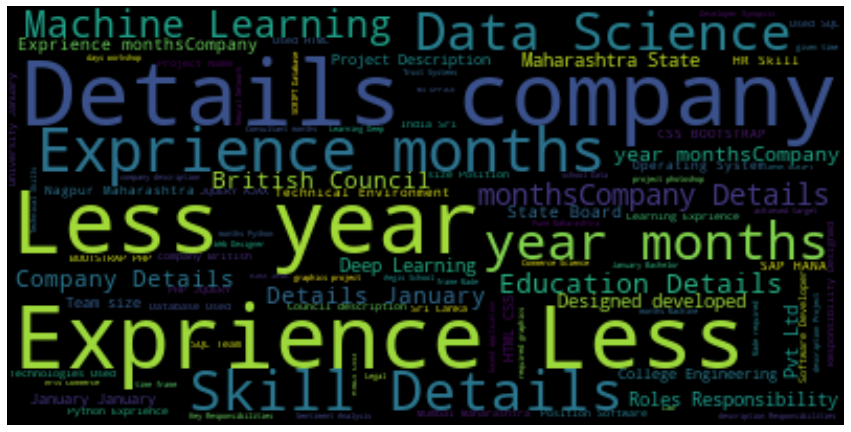

In [21]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
oneSetofStopWords = set(stopwords.words('english')+['``',"''"])

totalWords = []
Sentences = data['Resume'].values
cleanedSentences = ""
for i in range(0,160):
  cleanedText = cleanResume(Sentences[i])
  cleanedSentences += cleanedText
  requiredWords = nltk.word_tokenize(cleanedText)
  for word in requiredWords:
    if word not in oneSetofStopWords and word not in string.punctuation:
      totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



#Data Preprocessing

In [22]:
#encode the the category section
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
  data[i] = le.fit_transform(data[i])

data.head()




,Category,Resume,clean_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = data['clean_resume'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    stop_words = 'english',
    max_features=1500
)

word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
#train test split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=0, test_size= 0.33)



Model Training

In [28]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.75      0.86         8
           3       1.00      1.00      1.00        15
           4       0.91      1.00      0.95        10
           5       0.92      1.00      0.96        11
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        10
           8       1.00      0.88      0.94        17
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        13
          11       0.93      1.00      0.96        13
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.